In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
#Load customer data

df = pd.read_csv('customers-1.csv')

In [7]:
#Check the number of cells in each column with null values

null = df.isnull().sum()

print(null)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


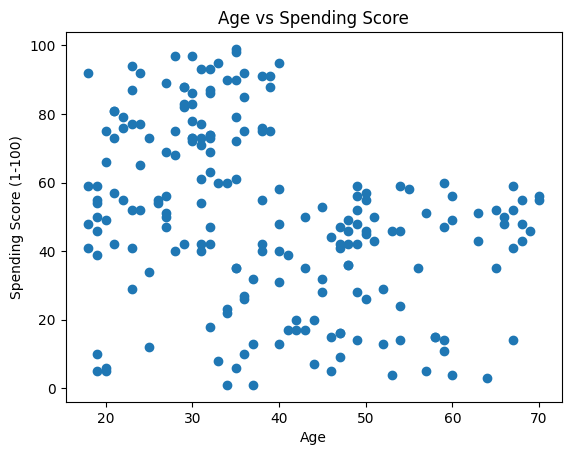

In [11]:
#Create a scatter plot with Age as X and Spending Score as Y.

plt.scatter(x=df['Age'], y=df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending Score')
plt.show()

In [18]:
X = df[["Age", "Spending Score (1-100)"]]
X.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


c:\Users\arvin\miniconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\arvin\miniconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\arvin\miniconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\arvin\miniconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users

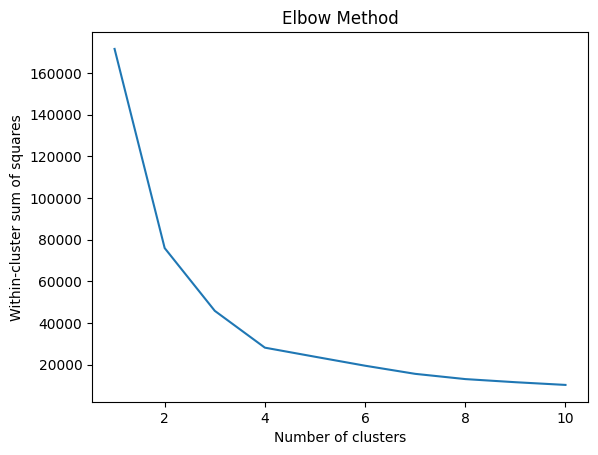

In [24]:
# Find out the best number for clusters between 1 and 10 (inclusive) using the elbow method.
wss = []
for k in range(1, 11):
    k = KMeans(n_clusters=k, random_state=0)
    k.fit(X)
    wss.append(k.inertia_)
# Plot the results
plt.plot(range(1, 11), wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

In [27]:
#Draw a scatter plot displaying data points colored on the basis of clusters.

k3= KMeans(n_clusters=3)
y_pred = k3.fit_predict(X)
X['clusters'] = y_pred
X.head()

c:\Users\arvin\miniconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\arvin\AppData\Local\Temp\ipykernel_12576\1701250190.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['clusters'] = y_pred


,Age,Spending Score (1-100),clusters
0,19,39,1
1,21,81,2
2,20,6,0
3,23,77,2
4,31,40,1


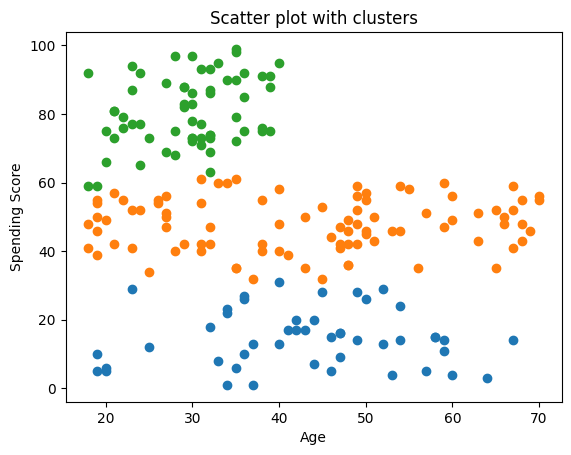

In [29]:
X0 = X[X['clusters']==0]
X1 = X[X['clusters']==1]
X2 = X[X['clusters']==2]

plt.scatter(X0['Age'],X0['Spending Score (1-100)'])
plt.scatter(X1['Age'],X1['Spending Score (1-100)'])
plt.scatter(X2['Age'],X2['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Scatter plot with clusters')
plt.show()